# Testing a base model

Currently i've chosen keras, as it would be quick to try things out + exam comming up (using keras) on 13th of January

In [1]:
%pip install scikit-learn keras 'tensorflow[and-cuda]' opencv-python python-dotenv pandas sqlalchemy PyMySQL matplotlib scikit-image 
#imgaugP

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2025-04-09 23:17:05.269071: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 23:17:05.372304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744233425.414776  345381 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744233425.426567  345381 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 23:17:05.524663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import keras
import numpy as np
import pandas as pd
import sys

In [4]:
from FrameLoader import FrameLoader
from DataRepository import DataRepository
from DataGeneratorSkills import DataGeneratorSkills
from helpers import plot

In [5]:
import os
import psutil

def process_memory():
    "Returns megabytes"
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / 1024 / 1024 / 1024

print(f"Current memory usage: {process_memory()} gigabytes")

Current memory usage: 0.69287109375 gigabytes


In [6]:
repo = DataRepository()
frameloader = FrameLoader(repo)
repo.VideoNames.head()

connection established, loading frame paths
relative paths of framelabels loaded


,folderId,id,name
id,,,
2214,16,2214,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
2215,16,2215,free-vids/DD3/2011-brewsterbayside-dd3-junsen-...
1084,5,1084,competition/belgium/SR1/2011-brewsterbayside-s...
1085,5,1085,competition/belgium/SR1/2011-brewsterbayside-s...
1086,5,1086,competition/belgium/SR1/2011-brewsterbayside-s...


In [7]:
%%time

train_gen = DataGeneratorSkills(
    frameloader=frameloader,
    train_test_val="train",
    dim=(224,224),
    batch_size=1
)

connection established, loading frame paths
relative paths of framelabels loaded


/home/miked/code/judge/computervision/DataGeneratorSkills.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)
/home/miked/code/judge/computervision/DataGeneratorSkills.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)
/home/miked/code/judge/computervision/DataGeneratorSkills.py:136: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is d

DataGeneratorSkills init done
CPU times: user 8.49 s, sys: 1.01 s, total: 9.5 s
Wall time: 10.4 s


In [8]:
train_gen.Skills

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
3405,3810,2288,3328,3356,4,1,1,1,2,0,2,0,0,0,0,0,0,2025-04-03
2395,2689,644,1579,1597,4,1,1,1,1,0,2,0,0,0,0,0,0,2025-03-08
61,144,1178,1111,1125,1,1,1,1,7,2,1,0,0,0,1,0,0,2025-02-09
440,605,1270,1352,1367,1,1,1,1,2,0,0,0,0,0,0,0,0,2025-02-09
70,153,1178,1314,1337,1,2,3,3,10,0,1,0,0,0,0,0,0,2025-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,962,1268,232,244,1,1,1,1,2,0,0,0,0,0,0,0,0,2025-02-09
3693,4205,2317,1893,1920,1,1,1,1,1,0,2,0,0,0,0,0,0,2025-04-04
2760,3165,1233,131,145,1,1,2,2,4,2,2,0,0,0,0,0,0,2025-03-11
3764,4277,2297,479,507,1,2,2,2,3,1,2,1,0,0,0,0,0,2025-04-08


In [9]:
train_gen.BalancedSkills7

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
0,118,1178,615,637,1,2,1,1,15,0,2,0,0,1,0,0,0,2025-02-09
1,225,2216,1998,2046,6,3,1,1,17,2,2,0,0,1,0,0,0,2025-02-09
2,285,2216,4457,4512,6,1,1,1,23,2,2,0,0,1,0,0,0,2025-02-09
3,386,649,521,559,6,4,1,1,17,2,0,0,0,1,0,0,0,2025-02-09
4,495,1184,821,854,6,1,1,1,23,2,2,0,0,1,0,0,0,2025-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93562,4475,1319,1075,1087,4,1,1,1,1,0,2,0,0,0,0,0,0,2025-04-09
93563,4476,1319,1087,1102,4,1,6,6,4,2,2,0,0,0,0,0,0,2025-04-09
93564,4477,1319,1102,1116,4,1,6,6,2,0,0,0,0,0,0,0,0,2025-04-09
93565,4478,1319,1116,1130,4,1,1,1,1,0,2,0,0,0,0,0,0,2025-04-09


In [10]:
train_gen.BalancedSkills3

,id,videoId,frameStart,frameEnd,type,rotations,turner1,turner2,skill,hands,feet,turntable,bodyRotations,backwards,sloppy,hard2see,fault,labeldate
17831,1307,1396,2108,2142,1,2,3,3,3,2,2,2,0,0,0,0,0,2025-02-09
18747,800,1243,580,594,4,1,9,7,3,2,2,1,0,0,0,0,0,2025-02-09
23669,2540,646,497,512,5,1,1,1,1,0,2,0,0,0,0,0,0,2025-03-08
9516,4369,668,1549,1576,1,1,1,1,11,2,1,0,0,0,0,0,0,2025-04-08
7862,187,1178,1832,1845,4,1,2,1,3,2,2,1,0,0,0,0,0,2025-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,3012,679,1943,1968,1,4,1,1,5,2,2,0,0,0,1,0,0,2025-03-10
22657,3076,1187,1030,1048,2,1,1,1,1,0,2,0,0,0,0,0,0,2025-03-10
11896,2820,1353,2258,2277,1,1,1,1,4,1,1,0,0,0,0,0,0,2025-03-08
7025,2770,1353,1276,1291,1,1,3,3,3,2,2,1,0,0,0,0,0,2025-03-08


## Pre balance - balanced comparison

1 mostly means normal (normal jump, normal turning, DD...)

In [11]:
total_accuracy = 0
metrics = 0
def get_df_spec_balance_comparison(col, gen):
    df = pd.concat([
        gen.Skills[col].value_counts(normalize=False), 
        gen.BalancedSkills3[col].value_counts(normalize=False),
        gen.BalancedSkills5[col].value_counts(normalize=False),
        gen.BalancedSkills7[col].value_counts(normalize=False),
        gen.BalancedSkills10[col].value_counts(normalize=False),
        gen.BalancedSkills12[col].value_counts(normalize=False),
        gen.Skills[col].value_counts(normalize=True),
        gen.BalancedSkills3[col].value_counts(normalize=True),
        gen.BalancedSkills5[col].value_counts(normalize=True),
        gen.BalancedSkills7[col].value_counts(normalize=True),
        gen.BalancedSkills10[col].value_counts(normalize=True),
        gen.BalancedSkills12[col].value_counts(normalize=True),
        ], axis=1)
    df.columns = ["normal", "n3", "n5", "n7", "n10", "n12", "percentage", "c3", "c5", "c7", "c10", "c12"]
    return df

In [12]:
col = 'type' # DD, CW, SD, snapperlike, transition
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
type,,,,,,,,,,,,
1,3023,16590,29856,58258,114442,163220,0.759166,0.680392,0.622207,0.622634,0.616154,0.614915
4,491,3809,8205,16199,32687,46544,0.123305,0.156215,0.170994,0.173127,0.175986,0.175350
5,159,905,2363,4526,9265,13406,0.039930,0.037116,0.049246,0.048372,0.049883,0.050506
6,158,1614,3920,7470,14856,21426,0.039679,0.066194,0.081694,0.079836,0.079984,0.080720
2,89,653,1757,3374,6818,9825,0.022351,0.026781,0.036616,0.036060,0.036708,0.037015
3,62,812,1883,3740,7668,11014,0.015570,0.033302,0.039242,0.039971,0.041284,0.041494


In [13]:
col = 'rotations'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
rotations,,,,,,,,,,,,
1,3219,15976,29242,57572,114027,162435,0.808388,0.655211,0.609411,0.615302,0.613920,0.611958
2,452,4960,10438,19948,39704,57053,0.113511,0.203420,0.217531,0.213195,0.213766,0.214942
0,177,1513,3724,7249,14590,20928,0.044450,0.062051,0.077609,0.077474,0.078552,0.078844
3,76,1062,2388,4556,8988,12923,0.019086,0.043555,0.049767,0.048692,0.048391,0.048686
4,44,642,1583,3076,6070,8712,0.011050,0.026330,0.032990,0.032875,0.032681,0.032822
6,7,99,275,523,1055,1514,0.001758,0.004060,0.005731,0.005590,0.005680,0.005704
5,4,73,179,343,695,996,0.001005,0.002994,0.003730,0.003666,0.003742,0.003752
8,2,47,123,237,479,689,0.000502,0.001928,0.002563,0.002533,0.002579,0.002596
7,1,11,32,63,128,185,0.000251,0.000451,0.000667,0.000673,0.000689,0.000697


In [14]:
col = 'turner1'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turner1,,,,,,,,,,,,
1,3116,12789,23669,45891,90638,129249,0.782521,0.524505,0.493269,0.490461,0.487994,0.486933
3,417,4521,9024,17754,35138,50078,0.104721,0.185416,0.188063,0.189746,0.189182,0.188664
2,219,3128,6338,12382,24700,35539,0.054997,0.128286,0.132086,0.132333,0.132984,0.133890
6,57,884,1941,3769,7588,10890,0.014314,0.036255,0.040451,0.040281,0.040854,0.041027
7,56,935,2069,4103,8221,11777,0.014063,0.038346,0.043119,0.043851,0.044262,0.044369
4,19,276,558,1093,2196,3144,0.004771,0.011319,0.011629,0.011681,0.011823,0.011845
9,18,328,785,1556,3139,4499,0.004520,0.013452,0.016360,0.016630,0.016900,0.016950
5,13,195,391,772,1529,2183,0.003265,0.007997,0.008149,0.008251,0.008232,0.008224
14,13,177,495,976,1983,2854,0.003265,0.007259,0.010316,0.010431,0.010676,0.010752


In [15]:
col = 'turner2'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turner2,,,,,,,,,,,,
1,3138,12962,24115,46743,92358,131692,0.788046,0.531600,0.502563,0.499567,0.497254,0.496137
3,408,4483,8839,17383,34412,49011,0.102461,0.183858,0.184207,0.185781,0.185274,0.184644
2,220,3105,6196,12113,24120,34720,0.055249,0.127343,0.129126,0.129458,0.129862,0.130804
6,61,1001,2243,4390,8832,12656,0.015319,0.041053,0.046745,0.046918,0.047551,0.047680
7,48,817,1820,3597,7193,10307,0.012054,0.033507,0.037929,0.038443,0.038727,0.038831
4,14,192,423,826,1658,2371,0.003516,0.007874,0.008815,0.008828,0.008927,0.008933
14,12,168,470,926,1883,2725,0.003014,0.006890,0.009795,0.009897,0.010138,0.010266
10,10,201,483,940,1873,2694,0.002511,0.008243,0.010066,0.010046,0.010084,0.010149
9,9,166,385,767,1555,2238,0.002260,0.006808,0.008024,0.008197,0.008372,0.008431


In [16]:
col = 'skill'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
skill,,,,,,,,,,,,
1,2010,3540,8813,17070,35238,50563,0.504771,0.145183,0.183665,0.182436,0.189721,0.190491
3,565,6003,10894,20710,40115,57156,0.141888,0.246196,0.227034,0.221339,0.215979,0.215330
2,522,3493,5933,12370,25118,35715,0.131090,0.143256,0.123645,0.132205,0.135235,0.134553
4,399,5006,7619,15046,28834,41365,0.100201,0.205307,0.158782,0.160805,0.155242,0.155839
7,126,1547,3376,6557,13345,18913,0.031642,0.063446,0.070357,0.070078,0.071849,0.071253
5,78,939,2353,4488,8820,12608,0.019588,0.038510,0.049037,0.047966,0.047487,0.047499
15,45,663,1520,2975,6017,8657,0.011301,0.027191,0.031677,0.031795,0.032395,0.032614
11,38,405,901,1700,3274,4695,0.009543,0.016610,0.018777,0.018169,0.017627,0.017688
10,37,462,942,1763,3470,4918,0.009292,0.018948,0.019632,0.018842,0.018682,0.018528


In [17]:
col = 'hands'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
hands,,,,,,,,,,,,
0,2599,7979,17096,34109,70051,100245,0.652687,0.327236,0.356285,0.364541,0.377154,0.377663
2,1060,12475,23580,44616,85255,121780,0.266198,0.511627,0.491414,0.476835,0.459012,0.458794
1,323,3929,7308,14842,30430,43410,0.081115,0.161137,0.152301,0.158624,0.163835,0.163543


In [18]:
col = 'feet'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
feet,,,,,,,,,,,,
2,2918,13188,28615,55267,109693,157173,0.732798,0.540869,0.596345,0.590668,0.590586,0.592134
1,615,7031,11006,21345,42387,60218,0.154445,0.288357,0.229368,0.228125,0.228211,0.226865
0,449,4164,8363,16955,33656,48044,0.112757,0.170775,0.174287,0.181207,0.181203,0.181001


In [19]:
col = 'bodyRotations'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
bodyRotations,,,,,,,,,,,,
0,3960,24065,47216,92043,182625,260970,0.994475,0.986958,0.983995,0.983712,0.983250,0.983179
1,16,184,480,950,1928,2773,0.004018,0.007546,0.010003,0.010153,0.010380,0.010447
2,6,134,288,574,1183,1692,0.001507,0.005496,0.006002,0.006135,0.006369,0.006374


In [20]:
col = 'turntable'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
turntable,,,,,,,,,,,,
0,3845,22199,43115,84131,167007,238548,0.965595,0.910429,0.898529,0.899152,0.899163,0.898706
1,106,1607,3572,6927,13730,19745,0.026620,0.065907,0.074441,0.074033,0.073922,0.074387
2,31,577,1297,2509,4999,7142,0.007785,0.023664,0.027030,0.026815,0.026915,0.026907


In [21]:
col = 'sloppy'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
sloppy,,,,,,,,,,,,
0,3867,22652,44057,85989,170588,243730,0.97112,0.929008,0.91816,0.91901,0.918443,0.918229
1,115,1731,3927,7578,15148,21705,0.02888,0.070992,0.08184,0.08099,0.081557,0.081771


In [22]:
col = 'backwards'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
backwards,,,,,,,,,,,,
0,3939,23641,46070,89843,178388,254838,0.989201,0.969569,0.960112,0.9602,0.960438,0.960077
1,43,742,1914,3724,7348,10597,0.010799,0.030431,0.039888,0.0398,0.039562,0.039923


In [23]:
col = 'hard2see'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
hard2see,,,,,,,,,,,,
0,3866,22884,44435,86705,171930,245714,0.970869,0.938523,0.926038,0.926662,0.925669,0.925703
1,116,1499,3549,6862,13806,19721,0.029131,0.061477,0.073962,0.073338,0.074331,0.074297


In [24]:
col = 'fault'
df = get_df_spec_balance_comparison(col, train_gen)
metrics +=1
total_accuracy += df["c7"].max()
df


,normal,n3,n5,n7,n10,n12,percentage,c3,c5,c7,c10,c12
fault,,,,,,,,,,,,
0,3799,22527,43723,85151,168758,241153,0.954043,0.923881,0.9112,0.910054,0.908591,0.90852
1,183,1856,4261,8416,16978,24282,0.045957,0.076119,0.0888,0.089946,0.091409,0.09148


In [25]:
print(f"minimum train accuracy = {(100*total_accuracy / metrics):.3f}%")

minimum train accuracy = 70.120%


<Axes: >

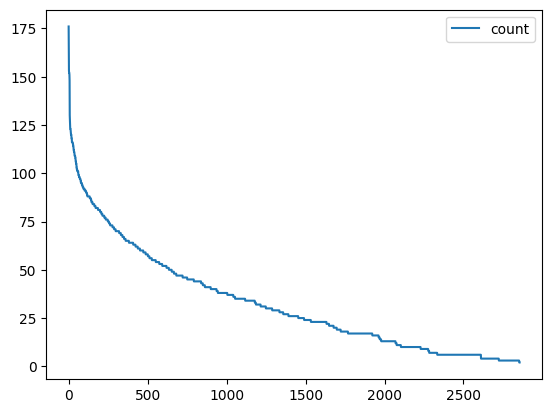

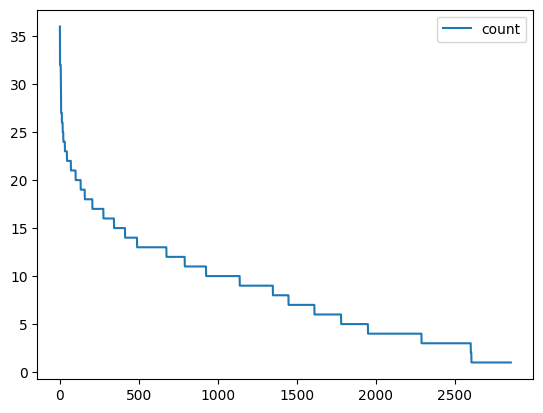

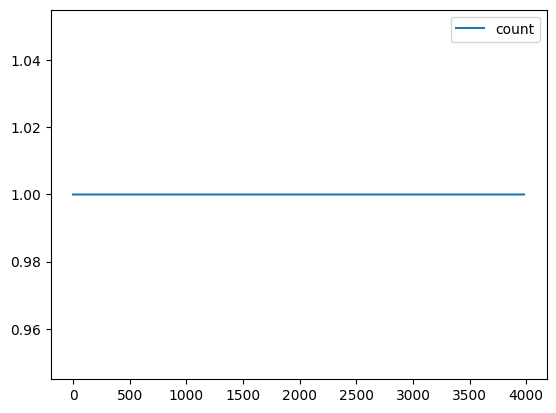

In [26]:
pd.DataFrame(train_gen.BalancedSkills7["id"].value_counts()).reset_index(drop=True).plot()
pd.DataFrame(train_gen.BalancedSkills3["id"].value_counts()).reset_index(drop=True).plot()
pd.DataFrame(train_gen.Skills["id"].value_counts()).reset_index(drop=True).plot()

In [27]:
pd.set_option("display.max_rows", 10)

## Skill balance function

In [28]:
col = 'turner2'
series_normalized_occurances = train_gen.Skills[col].value_counts(normalize=True)
max_occurance_percentage = series_normalized_occurances.iloc[0]

def get_multiplier(occurance_percentage: float, max_occurance_percentage: float, N = 10):
    """Calculate how many times more a skill needs to be added
    Returns a number in the interval [1, N["""
    assert isinstance(occurance_percentage, (int, float))
    assert isinstance(max_occurance_percentage, (int, float))
    assert occurance_percentage > 0 and occurance_percentage <= 1
    assert max_occurance_percentage > 0 and max_occurance_percentage <= 1
    assert max_occurance_percentage >= occurance_percentage, f"got {max_occurance_percentage} and {occurance_percentage}"

    multiplier = N * np.pow(1 - (np.sqrt(occurance_percentage / max_occurance_percentage)), 2)
    multiplier = multiplier if multiplier >= 1 else multiplier + 1
    multiplier_squared = multiplier * multiplier
    return multiplier_squared

for index, value in series_normalized_occurances.items():
    n3 = value * get_multiplier(value, max_occurance_percentage, N=3)
    n5 = value * get_multiplier(value, max_occurance_percentage, N=5)
    n7 = value * get_multiplier(value, max_occurance_percentage, N=7)
    n10 = value * get_multiplier(value, max_occurance_percentage, N=10)
    
    print(f"{index:2d} - {value:.3f} - {n3:.3f} - {n5:.3f} - {n7:.3f} - {n10:.3f}")

 1 - 0.788 - 0.788 - 0.788 - 0.788 - 0.788
 3 - 0.102 - 0.154 - 0.428 - 0.839 - 1.713
 2 - 0.055 - 0.145 - 0.404 - 0.791 - 1.614
 6 - 0.015 - 0.076 - 0.210 - 0.412 - 0.840
 7 - 0.012 - 0.064 - 0.178 - 0.348 - 0.711
 4 - 0.004 - 0.024 - 0.067 - 0.131 - 0.267
14 - 0.003 - 0.021 - 0.058 - 0.114 - 0.233
10 - 0.003 - 0.018 - 0.050 - 0.098 - 0.199
 9 - 0.002 - 0.016 - 0.045 - 0.089 - 0.181
11 - 0.002 - 0.015 - 0.041 - 0.080 - 0.163
 8 - 0.002 - 0.015 - 0.041 - 0.080 - 0.163
12 - 0.002 - 0.013 - 0.036 - 0.071 - 0.145
 5 - 0.002 - 0.011 - 0.032 - 0.062 - 0.126
22 - 0.002 - 0.011 - 0.032 - 0.062 - 0.126
18 - 0.002 - 0.011 - 0.032 - 0.062 - 0.126
13 - 0.001 - 0.010 - 0.027 - 0.052 - 0.107
17 - 0.001 - 0.008 - 0.022 - 0.043 - 0.087
20 - 0.001 - 0.006 - 0.017 - 0.033 - 0.066
15 - 0.001 - 0.004 - 0.011 - 0.022 - 0.045
24 - 0.001 - 0.004 - 0.011 - 0.022 - 0.045
26 - 0.001 - 0.004 - 0.011 - 0.022 - 0.045
16 - 0.001 - 0.004 - 0.011 - 0.022 - 0.045
21 - 0.000 - 0.002 - 0.006 - 0.011 - 0.023


In [29]:
max_occurance_percentage

np.float64(0.7880462079357107)

## Apply

In [30]:
info_columns = [
    'type', 'rotations', 'turner1', 'turner2', 'skill', 'turntable',
    'bodyRotations', 'hands', 'feet', 'sloppy', 'hard2see', 'fault',
    'backwards'
]

In [31]:
N = 7
balanced_skills = pd.DataFrame(columns=train_gen.Skills.columns)
for col in info_columns:
    series_normalized_occurances = train_gen.Skills[col].value_counts(normalize=True)
    max_occurance_percentage = series_normalized_occurances.iloc[0]

    for index, value in series_normalized_occurances.items():
        if value == max_occurance_percentage:
            continue
        rounded_multiplier = int(np.round(get_multiplier(value, max_occurance_percentage, N=7)))
        extra_skills = [train_gen.Skills[train_gen.Skills[col] == index] for _ in range(rounded_multiplier)]
        extra_skills.append(balanced_skills)
        balanced_skills = pd.concat(extra_skills, ignore_index=True)

/tmp/ipykernel_345381/2154607191.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_skills = pd.concat(extra_skills, ignore_index=True)


In [32]:
len(balanced_skills)

93567

In [33]:
balanced_skills["turntable"].value_counts(normalize=True)

turntable
0    0.899152
1    0.074033
2    0.026815
Name: proportion, dtype: float64